In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

In [2]:
# Import dataset
df_fundamentals = pd.read_excel('/content/sample_data/Data Suhu Udara Lampung fiks.xlsx')
df_fundamentals['Date'] = pd.to_datetime(df_fundamentals['Date'])

In [ ]:
df_fundamentals.shape

(1766, 4)

Text(0.5, 0, 'Date')

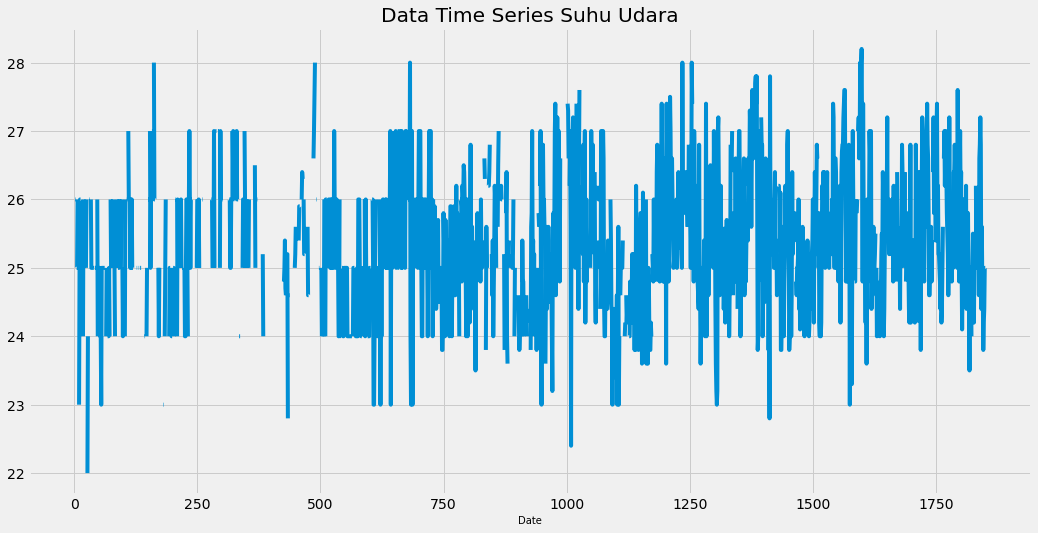

In [ ]:
# Visualisasi data
plt.figure(figsize=(16,8))
plt.title('Data Time Series Suhu Udara')
plt.plot(df_fundamentals['X1'])
plt.xlabel('Date',fontsize=10)

In [4]:
# Menghapus missing data untuk setiap kolom dengan cara mengganti data kosong dengan nilai meannya
df_fundamentals["X1"].fillna(df_fundamentals["X1"].mean(), inplace=True)
df_fundamentals["X2"].fillna(df_fundamentals["X2"].mean(), inplace=True)
df_fundamentals["X3"].fillna(df_fundamentals["X3"].mean(), inplace=True)

In [5]:
# Memisahkan data berdasarkan kolom
X1,X2,X3 =['X1'],['X2'],['X3']
data2 = pd.DataFrame(df_fundamentals)
Data_X1,Data_X2,Data_X3=data2[X1],data2[X2],data2[X3]

In [6]:
# Normalisasi data dengan Min-Max Scaling
scaler = MinMaxScaler()
Norm_X1,Norm_X2,Norm_X3 =scaler.fit_transform(Data_X1),scaler.fit_transform(Data_X2),scaler.fit_transform(Data_X3)

In [7]:
# Banyaknya baris
n_baris = df_fundamentals.shape[0]

In [8]:
# Jumlah data training
training_data_len = math.ceil(len(Data_X1)* .8)
training_data_len

1413

In [10]:
#Pembagian data training dan testing
train_data_X1 = Norm_X1[0:training_data_len, :]
train_data_X2 = Norm_X2[0:training_data_len, :]
train_data_X3 = Norm_X3[0:training_data_len, :]

In [13]:
# Pemodelan time series pada dataset
X_X1,X_X2,X_X3 =[],[],[]
y_X1,y_X2,y_X3 = [],[],[]

for i in range (30, len(train_data_X1)):
  X_X1.append(train_data_X1[i-30:i,0])
  y_X1.append(train_data_X1[i, 0])
  if i <= 30:
    print(X_X1)
    print(y_X1)
for i in range (30, len(train_data_X2)):
  X_X2.append(train_data_X2[i-30:i,0])
  y_X2.append(train_data_X2[i, 0])
  if i <= 30:
    print(X_X2)
    print(y_X2)
for i in range (30, len(train_data_X3)):
  X_X3.append(train_data_X3[i-30:i,0])
  y_X3.append(train_data_X3[i, 0])
  if i <= 30:
    print(X_X3)
    print(y_X3)

X_X1, y_X1, X_X2, y_X2, X_X3, y_X3= np.array(X_X1), np.array(y_X1),np.array(X_X2), np.array(y_X2),np.array(X_X3), np.array(y_X3)

[array([0.48387097, 0.5292181 , 0.64516129, 0.64516129, 0.5292181 ,
       0.48387097, 0.48387097, 0.64516129, 0.5292181 , 0.5292181 ,
       0.16129032, 0.48387097, 0.64516129, 0.64516129, 0.5292181 ,
       0.32258065, 0.5292181 , 0.5292181 , 0.32258065, 0.64516129,
       0.5292181 , 0.64516129, 0.5292181 , 0.5292181 , 0.48387097,
       0.64516129, 0.5292181 , 0.        , 0.32258065, 0.5292181 ])]
[0.5292180975542609]
[array([0.63134295, 0.63134295, 0.76470588, 0.71568627, 0.56862745,
       0.76470588, 0.66666667, 0.85294118, 0.58823529, 0.60784314,
       0.60784314, 0.63134295, 0.50980392, 0.60784314, 0.63134295,
       0.63134295, 0.47058824, 0.63134295, 0.63134295, 0.63134295,
       0.63134295, 0.41176471, 0.63134295, 0.63134295, 0.33333333,
       0.63134295, 0.63134295, 0.56862745, 0.63134295, 0.63134295])]
[0.6313429522752494]
[array([0.61380163, 0.61380163, 0.66153846, 0.67692308, 0.55384615,
       0.66153846, 0.55384615, 0.73846154, 0.52307692, 0.26153846,
       0.4307

In [14]:
X_X1 = np.reshape(X_X1,(X_X1.shape[0],X_X1.shape[1],1))
X_X1.shape
X_X2 = np.reshape(X_X2,(X_X2.shape[0],X_X2.shape[1],1))
X_X2.shape
X_X3 = np.reshape(X_X3,(X_X3.shape[0],X_X3.shape[1],1))
X_X3.shape

(1383, 30, 1)

In [15]:
# Buat model LSTM
model_X1=Sequential()
model_X1.add(LSTM(units=50,activation='tanh', recurrent_activation='sigmoid',return_sequences=True,input_shape=(X_X1.shape[1],1)))
model_X1.add(LSTM(units=50, return_sequences=False))
model_X1.add(Dropout(0.2))
model_X1.add(Dense(25))
model_X1.add(Dense(1))


model_X2=Sequential()
model_X2.add(LSTM(units=25,activation='tanh', recurrent_activation='sigmoid',return_sequences=True,input_shape=(X_X2.shape[1],1)))
model_X2.add(LSTM(units=25, return_sequences=False))
model_X2.add(Dropout(0.2))
model_X2.add(Dense(25))
model_X2.add(Dense(1))



model_X3=Sequential()
model_X3.add(LSTM(units=25,activation='tanh', recurrent_activation='sigmoid',return_sequences=True,input_shape=(X_X3.shape[1],1)))
model_X3.add(LSTM(units=25, return_sequences=False))
model_X3.add(Dropout(0.2))
model_X3.add(Dense(25))
model_X3.add(Dense(1))

In [16]:
model_X1.compile(loss='mean_squared_error',optimizer='adam')
model_X1.fit(X_X1,y_X1,epochs=50,batch_size=4,verbose=2)

model_X2.compile(loss='mean_squared_error',optimizer='adam')
model_X2.fit(X_X2,y_X2,epochs=50,batch_size=4,verbose=2)

model_X3.compile(loss='mean_squared_error',optimizer='adam')
model_X3.fit(X_X3,y_X3,epochs=50,batch_size=4,verbose=2)

Epoch 1/50
346/346 - 11s - loss: 0.0218 - 11s/epoch - 33ms/step
Epoch 2/50
346/346 - 8s - loss: 0.0189 - 8s/epoch - 23ms/step
Epoch 3/50
346/346 - 8s - loss: 0.0186 - 8s/epoch - 24ms/step
Epoch 4/50
346/346 - 7s - loss: 0.0177 - 7s/epoch - 21ms/step
Epoch 5/50
346/346 - 8s - loss: 0.0178 - 8s/epoch - 23ms/step
Epoch 6/50
346/346 - 9s - loss: 0.0175 - 9s/epoch - 25ms/step
Epoch 7/50
346/346 - 7s - loss: 0.0177 - 7s/epoch - 21ms/step
Epoch 8/50
346/346 - 8s - loss: 0.0172 - 8s/epoch - 23ms/step
Epoch 9/50
346/346 - 9s - loss: 0.0170 - 9s/epoch - 26ms/step
Epoch 10/50
346/346 - 7s - loss: 0.0169 - 7s/epoch - 21ms/step
Epoch 11/50
346/346 - 8s - loss: 0.0169 - 8s/epoch - 23ms/step
Epoch 12/50
346/346 - 8s - loss: 0.0171 - 8s/epoch - 22ms/step
Epoch 13/50
346/346 - 9s - loss: 0.0165 - 9s/epoch - 25ms/step
Epoch 14/50
346/346 - 9s - loss: 0.0167 - 9s/epoch - 25ms/step
Epoch 15/50
346/346 - 7s - loss: 0.0165 - 7s/epoch - 22ms/step
Epoch 16/50
346/346 - 8s - loss: 0.0168 - 8s/epoch - 23ms/step

In [ ]:
model_X1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
Dataset_X1,Dataset_X2,Dataset_X3= Data_X1.values,Data_X2.values,Data_X3.values
test_data_X1, test_data_X2, test_data_X3= Norm_X1 [training_data_len-30:, :],Norm_X2 [training_data_len-30:, :],Norm_X3 [training_data_len-30:, :]

X_test_X1,X_test_X2,X_test_X3 = [],[],[]
y_test_X1,y_test_X2,y_test_X3 = Dataset_X1[training_data_len:, : ],Dataset_X2[training_data_len:, : ],Dataset_X3[training_data_len:, : ]
for i in range (30, len(test_data_X1)):
  X_test_X1.append(test_data_X1[i-30:i, 0])
for i in range (30, len(test_data_X2)):
  X_test_X2.append(test_data_X2[i-30:i, 0])
for i in range (30, len(test_data_X3)):
  X_test_X3.append(test_data_X3[i-30:i, 0])

X_test_X1,X_test_X2,X_test_X3 = np.array(X_test_X1),np.array(X_test_X2),np.array(X_test_X3)

In [19]:
predictions_X1 = model_X1.predict(X_test_X1)

predictions_X2 = model_X2.predict(X_test_X2)

predictions_X3 = model_X3.predict(X_test_X3)

12/12 [==============================] - 1s 8ms/step


In [ ]:
predictions_X1

array([[0.41336134],
       [0.64239275],
       [0.5350053 ],
       [0.53785354],
       [0.50671124],
       [0.5251913 ],
       [0.53119457],
       [0.5196742 ],
       [0.537863  ],
       [0.50846165],
       [0.5499414 ],
       [0.5633949 ],
       [0.523255  ],
       [0.52042955],
       [0.52576596],
       [0.49325448],
       [0.49566358],
       [0.51035666],
       [0.5454062 ],
       [0.54707   ],
       [0.5440681 ],
       [0.52415824],
       [0.55473787],
       [0.47352064],
       [0.45709568],
       [0.47435972],
       [0.47522643],
       [0.50946975],
       [0.49374893],
       [0.447366  ],
       [0.46777585],
       [0.4828493 ],
       [0.5254662 ],
       [0.5103309 ],
       [0.50099885],
       [0.49955922],
       [0.57118237],
       [0.5812783 ],
       [0.5340636 ],
       [0.5248951 ],
       [0.46851006],
       [0.467312  ],
       [0.4838122 ],
       [0.48434484],
       [0.4488903 ],
       [0.46002853],
       [0.5300915 ],
       [0.493

In [20]:
predictions_X1 = scaler.inverse_transform(predictions_X1)
predictions_X2 = scaler.inverse_transform(predictions_X2)
predictions_X3 = scaler.inverse_transform(predictions_X3)

In [ ]:
predictions_X1

array([[26.886848],
       [28.375551],
       [27.677536],
       [27.696049],
       [27.493624],
       [27.613743],
       [27.652765],
       [27.577883],
       [27.69611 ],
       [27.505001],
       [27.77462 ],
       [27.862066],
       [27.601156],
       [27.582792],
       [27.617477],
       [27.406155],
       [27.421814],
       [27.517319],
       [27.74514 ],
       [27.755955],
       [27.736443],
       [27.607029],
       [27.805798],
       [27.277884],
       [27.171122],
       [27.283339],
       [27.28897 ],
       [27.511555],
       [27.409369],
       [27.10788 ],
       [27.240541],
       [27.338522],
       [27.615532],
       [27.51715 ],
       [27.456493],
       [27.447136],
       [27.912683],
       [27.978308],
       [27.671413],
       [27.611818],
       [27.245316],
       [27.23753 ],
       [27.34478 ],
       [27.348242],
       [27.117786],
       [27.190186],
       [27.645596],
       [27.408089],
       [27.42909 ],
       [27.445217],


In [ ]:
predictions_X1

array([[27.056215],
       [28.46016 ],
       [27.85914 ],
       [27.836153],
       [27.635609],
       [27.726452],
       [27.768703],
       [27.708124],
       [27.820305],
       [27.653902],
       [27.901777],
       [27.997913],
       [27.765615],
       [27.736732],
       [27.763384],
       [27.566643],
       [27.567734],
       [27.654203],
       [27.869488],
       [27.886951],
       [27.870811],
       [27.752726],
       [27.929798],
       [27.457035],
       [27.323118],
       [27.421637],
       [27.436665],
       [27.64813 ],
       [27.550644],
       [27.258696],
       [27.346706],
       [27.434462],
       [27.696405],
       [27.621265],
       [27.566784],
       [27.55785 ],
       [27.998123],
       [28.08811 ],
       [27.823107],
       [27.762726],
       [27.416035],
       [27.386383],
       [27.49266 ],
       [27.499699],
       [27.273281],
       [27.315102],
       [27.730127],
       [27.52398 ],
       [27.526606],
       [27.537165],


In [21]:
rmse = np.sqrt(np.mean(predictions_X1-y_test_X1)**2)
print(rmse)
rmse = np.sqrt(np.mean(predictions_X2-y_test_X2)**2)
print(rmse)
rmse = np.sqrt(np.mean(predictions_X3-y_test_X3)**2)
print(rmse)

2.428863719133018
4.068524234386568
0.08296647715233882


In [22]:
4# Mean Absolute Percentage Error (MAPE)
MAPE_X1 = np.mean((np.abs(np.subtract(y_test_X1, predictions_X1) / y_test_X1))) * 100
print(f'Mean Absolute Percentage Error (MAPE) X1: {np.round(MAPE_X1, 2)} %')
MAPE_X2 = np.mean((np.abs(np.subtract(y_test_X2, predictions_X2) / y_test_X2))) * 100
print(f'Mean Absolute Percentage Error (MAPE) X2: {np.round(MAPE_X2, 2)} %')
MAPE_X3 = np.mean((np.abs(np.subtract(y_test_X3, predictions_X3) / y_test_X3))) * 100
print(f'Mean Absolute Percentage Error (MAPE) X3: {np.round(MAPE_X3, 2)} %')

Mean Absolute Percentage Error (MAPE) X1: 9.82 %
Mean Absolute Percentage Error (MAPE) X2: 12.42 %
Mean Absolute Percentage Error (MAPE) X3: 2.46 %


In [23]:
X_test_X1, X_test_X2, X_test_X3=pd.DataFrame(X_test_X1),pd.DataFrame(X_test_X2),pd.DataFrame(X_test_X3)
predictions_X1,predictions_X2,predictions_X3=pd.DataFrame(predictions_X1),pd.DataFrame(predictions_X2),pd.DataFrame(predictions_X3)

In [ ]:
predictions_X1

,0
0,27.056215
1,28.460159
2,27.859140
3,27.836153
4,27.635609
...,...
348,26.255543
349,26.343309
350,26.272392
351,26.210346


<ipython-input-37-139c7f1a95a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_X1['predictions_X1'],valid_X2['predictions_X2'],valid_X3['predictions_X3']=predictions_X1,predictions_X2,predictions_X3


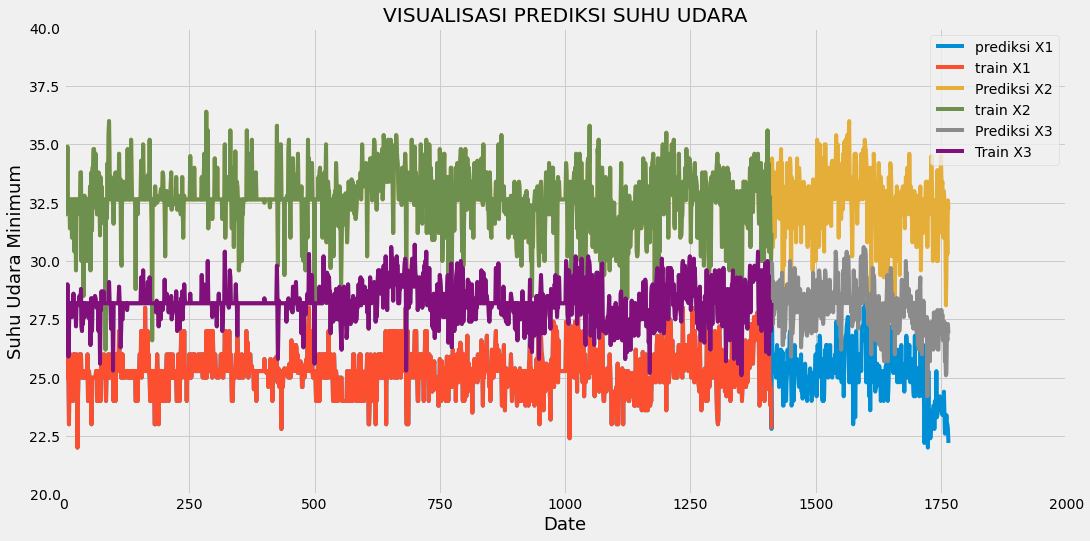

In [37]:
# Visualisasi data prediksi
train_X1,train_X2,train_X3 = Data_X1[:training_data_len],Data_X2[:training_data_len],Data_X3[:training_data_len]
valid_X1,valid_X2,valid_X3 = Data_X1[training_data_len:],Data_X2[training_data_len:],Data_X3[training_data_len:]
valid_X1['predictions_X1'],valid_X2['predictions_X2'],valid_X3['predictions_X3']=predictions_X1,predictions_X2,predictions_X3

plt.figure(figsize=(16,8))
plt.title('VISUALISASI PREDIKSI SUHU UDARA')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Suhu Udara Minimum',fontsize=18)
plt.plot(Data_X1['X1'],label='prediksi X1')
plt.plot(train_X1['X1'],label='train X1')

plt.plot(Data_X2['X2'],label='Prediksi X2')
plt.plot(train_X2['X2'],label='train X2')

plt.plot(Data_X3['X3'],label='Prediksi X3')
plt.plot(train_X3['X3'],label='Train X3')
plt.axis([0,2000,20,40])
plt.legend(loc="upper right")


In [ ]:
# Nilai weight dan bias
first_layer_weights_X1 = model_X1.layers[0].get_weights()[0]
first_layer_weights_X1

array([[ 7.05644265e-02,  5.56490235e-02,  2.49807477e-01,
        -6.75652146e-01,  2.52447516e-01,  2.15129822e-01,
        -1.40845358e-01, -5.05385935e-01,  1.78343147e-01,
        -6.26989603e-02, -3.87313157e-01, -4.04736668e-01,
        -1.34276405e-01, -4.53459918e-01, -1.28137618e-01,
         4.78646569e-02, -2.49352828e-01, -7.84338832e-01,
        -2.78604388e-01,  1.39083400e-01,  3.15367319e-02,
         9.08348501e-01, -5.39155900e-02, -6.21009529e-01,
         4.88587826e-01,  4.29363474e-02,  6.31411374e-02,
         3.99669074e-02,  9.07708146e-03, -2.98817456e-01,
         1.35110617e-01, -1.63422450e-02, -4.51050580e-01,
        -8.99302185e-01,  1.82217970e-01,  3.48767281e-01,
         1.45107850e-01,  1.92659386e-02,  2.85968304e-01,
        -6.65955126e-01,  7.99877048e-02, -9.09427345e-01,
        -6.90806508e-01,  1.75421596e-01,  3.64056408e-01,
        -5.75867534e-01,  2.62489486e-02, -5.24698377e-01,
         3.04390877e-01, -4.67034578e-02, -1.48649231e-0

In [ ]:
first_layer_biases_X1 = model_X1.layers[0].get_weights()[1]
first_layer_biases_X1

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.076146,0.236168,0.289542,0.180812,0.406865,0.235512,0.256814,0.196126,0.242897,0.041093,...,0.030272,-0.049306,0.031567,0.022878,-0.069041,0.043965,-0.087539,0.085383,-0.013965,-0.188299
1,0.179815,-0.354692,-0.314781,0.013560,-0.686029,-0.394139,-0.242173,-0.218578,-0.243550,-0.317611,...,-0.097803,-0.119006,0.072059,-0.039687,-0.076662,0.009082,-0.004667,-0.161873,0.136535,0.124996
2,0.006845,-0.312322,-0.182907,-0.194175,-0.615079,-0.322804,-0.318630,-0.195175,-0.336558,-0.294257,...,-0.110017,-0.240977,-0.023777,-0.024181,0.018388,0.087795,-0.013083,-0.253261,0.132762,-0.080765
3,-0.104404,-0.043693,-0.111683,-0.100283,-0.160288,-0.144276,-0.190255,-0.206897,-0.068630,0.037600,...,-0.117269,-0.119081,0.086240,-0.033239,0.013896,0.032610,0.084304,-0.050865,-0.001055,-0.051395
4,-0.088960,0.314983,0.277942,0.081534,0.834496,0.682208,0.613105,0.282391,0.375075,0.363812,...,0.076505,0.038213,0.061273,0.289152,0.053994,0.074224,-0.040389,0.239376,0.175897,0.085615
5,0.073854,-0.402456,-0.454652,-0.136155,-0.737926,-0.750074,-0.593093,-0.278035,-0.295441,-0.487219,...,-0.031331,-0.171109,-0.146023,-0.256430,-0.180963,0.060997,-0.032017,-0.248471,-0.067711,-0.166120
6,-0.083540,0.278495,0.510752,0.013099,1.009706,0.817186,0.434702,0.096197,0.371386,0.460911,...,0.109284,-0.039068,0.062015,0.262249,0.091027,-0.082107,-0.162048,0.304339,-0.105033,-0.200885
7,0.030152,-0.207287,-0.355873,0.073904,-0.623928,-0.557963,-0.207420,-0.127635,-0.168803,-0.384919,...,-0.056248,-0.022823,0.046714,-0.082866,-0.155153,-0.007454,-0.107419,-0.042067,-0.244642,-0.015879
8,0.141599,-0.307305,-0.417337,0.021904,-0.711169,-0.491861,-0.337611,-0.195496,-0.298558,-0.330514,...,0.041467,-0.135855,0.036257,-0.138887,0.137333,-0.043699,-0.051291,-0.093189,0.061114,0.238127
9,0.027827,-0.034368,0.006746,-0.142867,-0.389780,-0.265782,-0.216197,-0.193161,0.011355,-0.258912,...,-0.093856,-0.100520,0.055357,-0.094973,-0.130987,-0.164472,-0.085983,-0.187801,-0.224423,0.013952


In [ ]:
# Get the quote
last_day_30 = Data_X1[-35:].values
last_day_30 = scaler.transform(last_day_30)

X_test_X1 = []

X_test_X1.append(last_day_30)
X_test_X1 = np.array(X_test_X1)
X_test_X1 = np.reshape(X_test_X1,(X_test_X1.shape[0],X_test_X1.shape[1],1))
pred_price = model_X1.predict(X_test_X1)
pred_price

1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[27.429144]], dtype=float32)